## بررسی عملکرد الگوریتم های مختلف یادگیری ماشین و روش های حذف داده های پرت و نمونه برداری از داده ها به منظور افزایش دقت در پیشبینی و تشخیص بیماری دیابت

## استاد راهنما
### دکتر فاطمه زمانی

## دانشجو
### ابوالفصل حسینی فر

## importing needed packages

In [1]:
from numpy import hstack
from numpy import array
from sklearn.feature_selection import SequentialFeatureSelector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from cross_validation_score import k_fold_results
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay, 
                        precision_score, recall_score, f1_score, 
                        plot_roc_curve, plot_precision_recall_curve,
                        accuracy_score)
df = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv" , nrows=8000)
len(df)
df.head(5)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


## Description of Dataset columns

In [2]:
info = ["target variable Diabetes_binary has 2 classes. 0 is for no diabetes, and 1 is for diabetes",
        "1: high blood pressure, 0: no high blood pressure",
        "1: high cholesterol, 0: no high cholesterol",
        "1: cholesterol checked within past five years , 0: not checked within 5 years",
        "claculated BMI",
        "1: smoker , 0: not smoker",
        "1: had stroke , 0: didn't have stroke",
        "1: had heart disease or heart attack , 0: didn't have heart disease or heart attack",
        "1: Meet Aerobic Recommendations ( physical activity more than 150 minutes per week ,yes) , 0: no or low physical activity",
        "1: more than 1 fruit per day , 0: no fruits per day",
        "1: Consume Vegetables 1 or more times per day , not consumed vegetables",
        "1: having more than 14 drinks per week for men or 7 for women , 0 : not drinking too much ( lower than 14 per week for men or 7 for women)",
        "About how long has it been since you last visited a doctor for a routine checkup? 1: within past year , 0: more than 1 year",
        "1: yes 0: no ( Was there a time in the past 12 months when you needed to see a doctor but could not because of cost?)",
        "Would you say that in general your health is? 1: yes, 2: Very good, 3: Good, 4: fair, 5:poor",
        "Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good?",
        "During the past 30 days, for about how many days did poor physical or mental health keep you from doing your usual activities, such as self-care, work, or recreation?",
        "Do you have serious difficulty walking or climbing stairs? 1: yes, 0: no",
        "1: male , 0: female",
        "Fourteen-level age category , 1: Age 18 to 24 , 2: Age 25 to 29 , 3: Age 30 to 34 , ... , 13: Age 80 or older",
        "1: Never attended school or only kindergarten , 2: Grades 1 through 8 (Elementary), 3: Grades 9 through 11 (Some high school), 4:Grade 12 or GED (High school graduate), 5:College 1 year to 3 years (Some college or technical school), 6:College 4 years or more (College graduate) ",
        "what Is your annual household income from all sources: 1:1 Less than $10,000 , 2: $10,000 to less than $15,000, 3: $15,000 to less than $20,000, 4: $20,000 to less than $25,000, 5:$25,000 to less than $35,000, ... , 8: $75,000 or more"
        ]

for i in range(len(info)):
    print(df.columns[i]+":\t\t"+info[i])

Diabetes_binary:		target variable Diabetes_binary has 2 classes. 0 is for no diabetes, and 1 is for diabetes
HighBP:		1: high blood pressure, 0: no high blood pressure
HighChol:		1: high cholesterol, 0: no high cholesterol
CholCheck:		1: cholesterol checked within past five years , 0: not checked within 5 years
BMI:		claculated BMI
Smoker:		1: smoker , 0: not smoker
Stroke:		1: had stroke , 0: didn't have stroke
HeartDiseaseorAttack:		1: had heart disease or heart attack , 0: didn't have heart disease or heart attack
PhysActivity:		1: Meet Aerobic Recommendations ( physical activity more than 150 minutes per week ,yes) , 0: no or low physical activity
Fruits:		1: more than 1 fruit per day , 0: no fruits per day
Veggies:		1: Consume Vegetables 1 or more times per day , not consumed vegetables
HvyAlcoholConsump:		1: having more than 14 drinks per week for men or 7 for women , 0 : not drinking too much ( lower than 14 per week for men or 7 for women)
AnyHealthcare:		About how long has it 

In [3]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,...,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,0.165625,0.474875,0.448625,0.959375,28.795125,0.449500,0.048250,0.100250,0.736375,0.590250,...,0.93850,0.112125,2.627875,3.589125,4.845750,0.199875,0.419750,7.993375,4.975375,5.898125
std,0.371767,0.499400,0.497385,0.197432,6.382338,0.497474,0.214307,0.300352,0.440626,0.491818,...,0.24026,0.315540,1.114811,7.884578,9.258424,0.399931,0.493549,2.976943,1.001321,2.153793
min,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.00000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,4.000000
50%,0.000000,0.000000,0.000000,1.000000,28.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.00000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.00000,0.000000,3.000000,2.000000,4.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,74.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       8000 non-null   float64
 1   HighBP                8000 non-null   float64
 2   HighChol              8000 non-null   float64
 3   CholCheck             8000 non-null   float64
 4   BMI                   8000 non-null   float64
 5   Smoker                8000 non-null   float64
 6   Stroke                8000 non-null   float64
 7   HeartDiseaseorAttack  8000 non-null   float64
 8   PhysActivity          8000 non-null   float64
 9   Fruits                8000 non-null   float64
 10  Veggies               8000 non-null   float64
 11  HvyAlcoholConsump     8000 non-null   float64
 12  AnyHealthcare         8000 non-null   float64
 13  NoDocbcCost           8000 non-null   float64
 14  GenHlth               8000 non-null   float64
 15  MentHlth             

<AxesSubplot: >

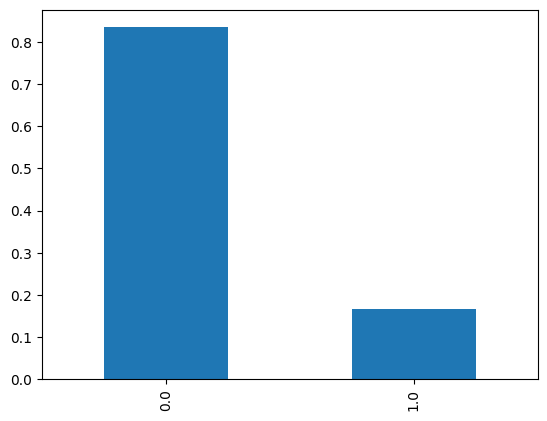

In [4]:
df.info()
df.describe()
df.isna().any()


df['Diabetes_binary'].value_counts(normalize=True).plot(kind='bar')

## Analyze the features on the chart

### analysing the target(Diabetes_binary) feature

0.0    6675
1.0    1325
Name: Diabetes_binary, dtype: int64


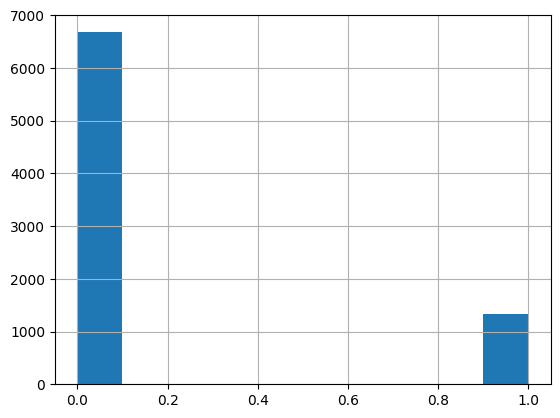

In [26]:
target_diagram = df["Diabetes_binary"]
target_temp = df.Diabetes_binary.value_counts()
print(target_temp)
target_diagram.hist()
plt.show()

### analysing the Age feature

9.0     1078
10.0    1013
8.0     1006
7.0      879
11.0     752
6.0      647
5.0      509
12.0     497
13.0     451
4.0      451
3.0      319
2.0      229
1.0      169
Name: Age, dtype: int64


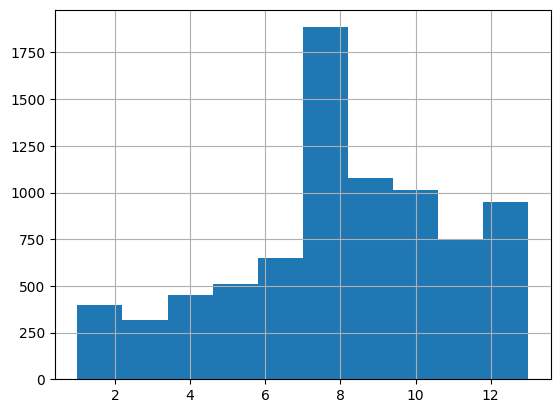

In [27]:
target_diagram = df["Age"]
target_temp = df.Age.value_counts()
print(target_temp)
target_diagram.hist()
plt.show()

### analysing the PhysActivity feature

1.0    5891
0.0    2109
Name: PhysActivity, dtype: int64


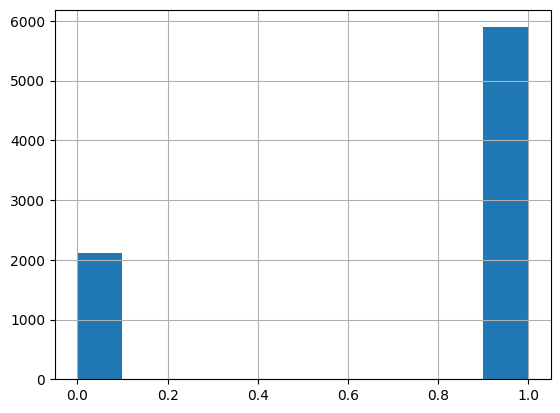

In [28]:
target_diagram = df["PhysActivity"]
target_temp = df.PhysActivity.value_counts()
print(target_temp)
target_diagram.hist()
plt.show()

In [2]:
X = np.asarray(df[['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack','PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth','MentHlth','PhysHlth' , 'DiffWalk' , 'Sex' , 'Age' , 'Education' , 'Income']])
y = np.asarray(df['Diabetes_binary'])

print(X.shape)

(8000, 21)


In [3]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (6400, 21) (6400,)
Test set: (1600, 21) (1600,)


## output of algorithms KFold

In [4]:
algo={
    'NB':MultinomialNB(alpha=1.0),
    'Logistic Regression':LogisticRegression(C=0.01, solver='liblinear',max_iter=1000),
    'SVM':SVC(kernel='rbf', gamma=0.1 ),
    'KNN':KNeighborsClassifier(n_neighbors=5),
    'Dtree':DecisionTreeClassifier(),
    'Multi-layer-Perceptron':MLPClassifier(random_state=3, max_iter=500),
}

result_beforeNorm=k_fold_results(X_train,y_train,algo=algo)

In [5]:
r = result_beforeNorm.sort_values(by = 'accuracy' , ascending=False , axis = 1)
r.T

,accuracy,recall,specificity,precision,F1
SVM,0.832969,0.025604,0.992694,0.456144,0.048212
Multi-layer-Perceptron,0.832500,0.159153,0.965919,0.479427,0.233668
Logistic Regression,0.832031,0.078787,0.980897,0.442670,0.133283
KNN,0.815000,0.175221,0.941374,0.370474,0.237805
Dtree,0.757656,0.333888,0.841639,0.293993,0.312371
NB,0.741875,0.366315,0.816133,0.282624,0.318851


## ensemble learning

In [9]:
level0 = list()
level0.append(('lr', LogisticRegression(max_iter=1000)))
level0.append(('mlp', MLPClassifier(max_iter=1000)))
level0.append(('knn', KNeighborsClassifier()))
#level0.append(('DT' , DecisionTreeClassifier(random_state=42)))
level0.append(('svm', SVC(kernel='rbf', gamma=0.1 )))
level1 = LogisticRegression(max_iter=1000)
cvv = KFold(n_splits=5,shuffle=True,random_state=4)
enn = StackingClassifier(estimators=level0, final_estimator=level1, cv=cvv)
enn.fit(X_train, y_train)
yhat_ensemble = enn.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test,yhat_ensemble).ravel()
accuracy = accuracy_score(y_test, yhat_ensemble)
precision = precision_score(y_test,yhat_ensemble)
recall = recall_score(y_test,yhat_ensemble)
F1 = f1_score(y_test,yhat_ensemble)
specificity = tn / (tn+fp)

result_beforeNorm['Ensemble'] = np.array([accuracy,recall,specificity,precision,F1])



In [10]:
f = result_beforeNorm.sort_values(by = 'accuracy' , ascending=False , axis = 1)
f.T

,accuracy,recall,specificity,precision,F1
Ensemble,0.846250,0.220149,0.972222,0.614583,0.324176
SVM,0.832969,0.025604,0.992694,0.456144,0.048212
Multi-layer-Perceptron,0.832500,0.159153,0.965919,0.479427,0.233668
Logistic Regression,0.832031,0.078787,0.980897,0.442670,0.133283
KNN,0.815000,0.175221,0.941374,0.370474,0.237805
Dtree,0.755000,0.318045,0.841610,0.283545,0.299527
NB,0.741875,0.366315,0.816133,0.282624,0.318851


## Isolation Forest

In [11]:
model=IsolationForest(n_estimators=100, max_samples='auto', contamination=float(0.1),max_features=1.0)
model.fit(X)
df_temp = df.copy()
df_temp['scores']=model.decision_function(X)
df_temp['anomaly']=model.predict(X)
df_temp.head(30)
outliers_counter = len(df_temp[df_temp['scores'] < 0])
outliers_counter
dff = df_temp[df_temp['scores'] > 0]
len(dff)

7200

In [12]:
X = np.asarray(dff[['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack','PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth','MentHlth','PhysHlth' , 'DiffWalk' , 'Sex' , 'Age' , 'Education' , 'Income']])
y = np.asarray(dff['Diabetes_binary'])

print(X.shape)

(7200, 21)


In [13]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (5760, 21) (5760,)
Test set: (1440, 21) (1440,)


## output of algorithms KFold

In [14]:
algo={
    'NB':MultinomialNB(alpha=1.0),
    'Logistic Regression':LogisticRegression(C=0.01, solver='liblinear',max_iter=1000),
    'SVM':SVC(kernel='rbf', gamma=0.1 ),
    'KNN':KNeighborsClassifier(n_neighbors=5),
    'Dtree':DecisionTreeClassifier(),
    'Multi-layer-Perceptron':MLPClassifier(random_state=3, max_iter=500),
}

result_beforeNorm=k_fold_results(X_train,y_train,algo=algo)

In [13]:
r = result_beforeNorm.sort_values(by = 'accuracy' , ascending=False , axis = 1)
r.T

,accuracy,recall,specificity,precision,F1
SVM,0.850000,0.027559,0.994490,0.440079,0.051593
Multi-layer-Perceptron,0.849826,0.112248,0.979871,0.512454,0.170472
Logistic Regression,0.848264,0.069823,0.985128,0.464128,0.120553
KNN,0.833160,0.154988,0.952447,0.364576,0.217082
NB,0.786979,0.256877,0.880064,0.277462,0.266011
Dtree,0.775347,0.314944,0.856283,0.278187,0.295360


## ensemble learning

In [14]:
level0 = list()
level0.append(('lr', LogisticRegression(max_iter=1000)))
level0.append(('mlp', MLPClassifier(max_iter=1000)))
level0.append(('knn', KNeighborsClassifier()))
#level0.append(('DT' , DecisionTreeClassifier(random_state=42)))
level0.append(('svm', SVC(kernel='rbf', gamma=0.1 )))
level1 = LogisticRegression(max_iter=1000)
cvv = KFold(n_splits=5,shuffle=True,random_state=4)
enn = StackingClassifier(estimators=level0, final_estimator=level1, cv=cvv)
enn.fit(X_train, y_train)
yhat_ensemble = enn.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test,yhat_ensemble).ravel()
accuracy = accuracy_score(y_test, yhat_ensemble)
precision = precision_score(y_test,yhat_ensemble)
recall = recall_score(y_test,yhat_ensemble)
F1 = f1_score(y_test,yhat_ensemble)
specificity = tn / (tn+fp)

result_beforeNorm['Ensemble'] = np.array([accuracy,recall,specificity,precision,F1])


In [15]:
f = result_beforeNorm.sort_values(by = 'accuracy' , ascending=False , axis = 1)
f.T


,accuracy,recall,specificity,precision,F1
Ensemble,0.855556,0.160194,0.971637,0.485294,0.240876
SVM,0.850000,0.027559,0.994490,0.440079,0.051593
Multi-layer-Perceptron,0.849826,0.112248,0.979871,0.512454,0.170472
Logistic Regression,0.848264,0.069823,0.985128,0.464128,0.120553
KNN,0.833160,0.154988,0.952447,0.364576,0.217082
NB,0.786979,0.256877,0.880064,0.277462,0.266011
Dtree,0.775347,0.314944,0.856283,0.278187,0.295360


## smoteTomek

In [16]:
from imblearn.combine import SMOTETomek 

oversample = SMOTETomek(random_state=42)
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)
X_test_smote, y_test_smote = oversample.fit_resample(X_test, y_test)
XX , YY = oversample.fit_resample(X, y)
X = XX
y = YY

print('original X , Y', X.shape , y.shape)
print('smote X , Y', XX.shape, YY.shape)

print('original train', X_train.shape, y_train.shape)
print('smote train', X_train_smote.shape, y_train_smote.shape)

print('original test', X_test.shape, y_test.shape)
print('smote test', X_test_smote.shape, y_test_smote.shape)

X_train = X_train_smote
y_train = y_train_smote
X_test = X_test_smote
y_test = y_test_smote

original X , Y (12238, 21) (12238,)
smote X , Y (12238, 21) (12238,)
original train (5760, 21) (5760,)
smote train (9782, 21) (9782,)
original test (1440, 21) (1440,)
smote test (2460, 21) (2460,)


In [17]:
YY.shape
type(XX)
np.append(XX , YY)
dff_columns = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack','PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth','MentHlth','PhysHlth' , 'DiffWalk' , 'Sex' , 'Age' , 'Education' , 'Income']
dfc = pd.DataFrame(XX, columns = dff_columns)
dfc['Diabetes_binary'] = YY
dfc.head(10)

        


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,0.0
1,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,0.0
2,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,0.0
3,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0,0.0
4,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0,0.0
5,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0,0.0
6,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0,0.0
7,0.0,0.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,3.0,0.0,0.0,0.0,1.0,13.0,6.0,8.0,1.0
8,1.0,1.0,1.0,34.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,3.0,0.0,30.0,1.0,0.0,10.0,5.0,1.0,0.0
9,0.0,0.0,1.0,26.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,3.0,0.0,15.0,0.0,0.0,7.0,5.0,7.0,0.0


In [18]:
X = np.asarray(dfc[['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack','PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth','MentHlth','PhysHlth' , 'DiffWalk' , 'Sex' , 'Age' , 'Education' , 'Income']])
y = np.asarray(dfc['Diabetes_binary'])

print(X.shape)

(12238, 21)


In [19]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (9790, 21) (9790,)
Test set: (2448, 21) (2448,)


## output of algorithms KFold

In [ ]:
algo={
    'NB':MultinomialNB(alpha=1.0),
    'Logistic Regression':LogisticRegression(C=0.01, solver='liblinear',max_iter=1000),
    'SVM':SVC(kernel='rbf', gamma=0.1 ),
    'KNN':KNeighborsClassifier(n_neighbors=5),
    'Dtree':DecisionTreeClassifier(),
    'Multi-layer-Perceptron':MLPClassifier(random_state=3, max_iter=500),
}

result_beforeNorm=k_fold_results(X_train,y_train,algo=algo)

In [ ]:
r = result_beforeNorm.sort_values(by = 'accuracy' , ascending=False , axis = 1)
r.T

## ensemble learning

In [ ]:
level0 = list()
level0.append(('lr', LogisticRegression(max_iter=1000)))
level0.append(('mlp', MLPClassifier(max_iter=1000)))
level0.append(('knn', KNeighborsClassifier()))
#level0.append(('DT' , DecisionTreeClassifier(random_state=42)))
level0.append(('svm', SVC(kernel='rbf', gamma=0.1 )))
level1 = LogisticRegression(max_iter=1000)
cvv = KFold(n_splits=5,shuffle=True,random_state=4)
enn = StackingClassifier(estimators=level0, final_estimator=level1, cv=cvv)
enn.fit(X_train, y_train)
yhat_ensemble = enn.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test,yhat_ensemble).ravel()
accuracy = accuracy_score(y_test, yhat_ensemble)
precision = precision_score(y_test,yhat_ensemble)
recall = recall_score(y_test,yhat_ensemble)
F1 = f1_score(y_test,yhat_ensemble)
specificity = tn / (tn+fp)

result_beforeNorm['Ensemble'] = np.array([accuracy,recall,specificity,precision,F1])


In [ ]:
f = result_beforeNorm.sort_values(by = 'accuracy' , ascending=False , axis = 1)
f.T

## feature selection

### Correlation:

In [104]:
df_test = dfc
df_test.head(10)

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,0.0
1,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,0.0
2,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,0.0
3,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0,0.0
4,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0,0.0
5,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0,0.0
6,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0,0.0
7,0.0,0.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,3.0,0.0,0.0,0.0,1.0,13.0,6.0,8.0,1.0
8,1.0,1.0,1.0,34.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,3.0,0.0,30.0,1.0,0.0,10.0,5.0,1.0,0.0
9,0.0,0.0,1.0,26.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,3.0,0.0,15.0,0.0,0.0,7.0,5.0,7.0,0.0


<AxesSubplot: >

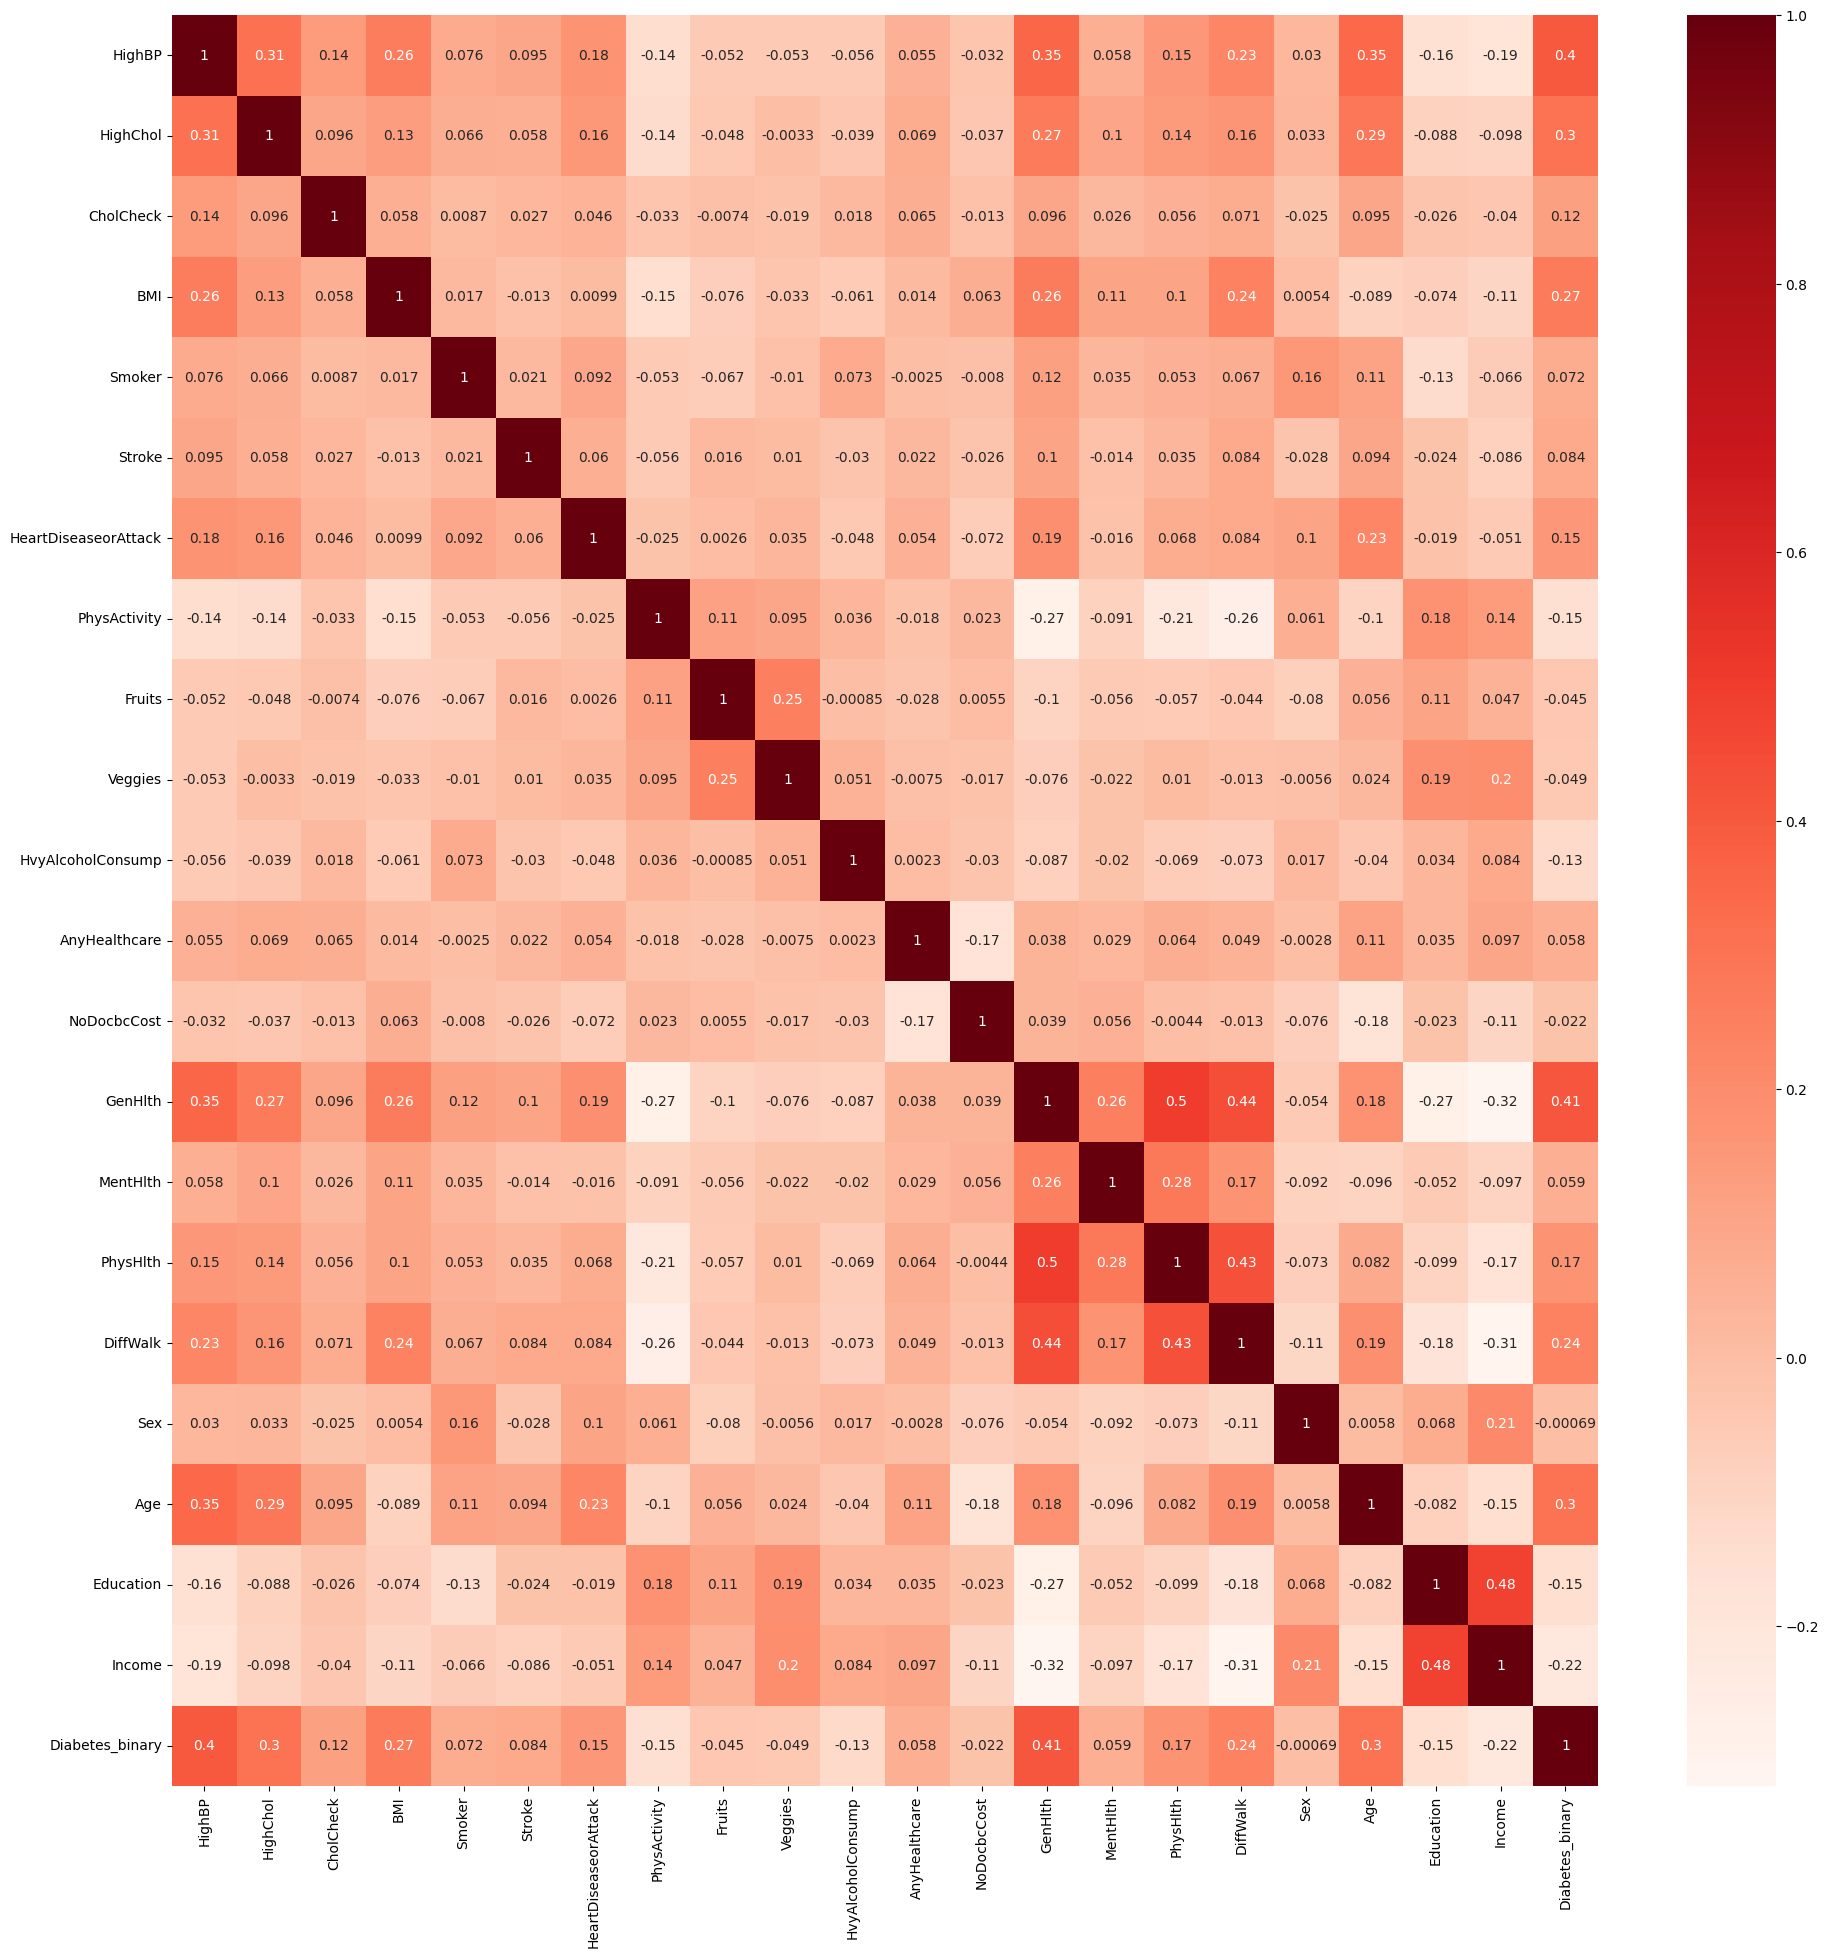

In [105]:
cor = df_test.corr()
plt.figure(figsize = (23,23))
sns.heatmap(cor, annot=True,cmap=plt.cm.Reds)



In [106]:
#Correlation with output variable
cor_target = abs(cor["Diabetes_binary"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.25]
relevant_features

HighBP             0.400788
HighChol           0.299574
BMI                0.272576
GenHlth            0.407654
Age                0.299935
Diabetes_binary    1.000000
Name: Diabetes_binary, dtype: float64

In [107]:
df_select_correlation = np.array(relevant_features.index)
df_select_correlation

array(['HighBP', 'HighChol', 'BMI', 'GenHlth', 'Age', 'Diabetes_binary'],
      dtype=object)

In [108]:
df_correlation = df_test.copy()
df_correlation = df_test[df_select_correlation]
df2_corr = df_correlation.drop(['Diabetes_binary'] , axis=1)
df_corr_col =df2_corr.columns
print(df_corr_col)
X = np.asarray(df2_corr)
y = np.asarray(df_correlation['Diabetes_binary'])
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
df_correlation.head(10)

Index(['HighBP', 'HighChol', 'BMI', 'GenHlth', 'Age'], dtype='object')
Train set: (9752, 5) (9752,)
Test set: (2438, 5) (2438,)


,HighBP,HighChol,BMI,GenHlth,Age,Diabetes_binary
0,1.0,1.0,40.0,5.0,9.0,0.0
1,1.0,0.0,27.0,2.0,11.0,0.0
2,1.0,1.0,24.0,2.0,11.0,0.0
3,1.0,1.0,25.0,2.0,10.0,0.0
4,1.0,0.0,30.0,3.0,9.0,0.0
5,1.0,1.0,25.0,3.0,11.0,0.0
6,0.0,0.0,24.0,2.0,8.0,0.0
7,0.0,0.0,25.0,3.0,13.0,1.0
8,1.0,1.0,34.0,3.0,10.0,0.0
9,0.0,0.0,26.0,3.0,7.0,0.0


### Check the output of the algorithms for df_corr (output of Correlation) :

In [109]:
algo={
    'NB':MultinomialNB(alpha=1.0),
    'Logistic Regression':LogisticRegression(C=0.01, solver='liblinear',max_iter=1000),
    'SVM':SVC(kernel='rbf', gamma=0.1 ),
    'KNN':KNeighborsClassifier(n_neighbors=5),
    'Dtree':DecisionTreeClassifier(),
    'Multi-layer-Perceptron':MLPClassifier(random_state=3, max_iter=500),
}
result_beforeNorm=k_fold_results(X_train,y_train,algo=algo)
result_beforeNorm.sort_values(by = 'accuracy' , ascending=False , axis = 1).T

,accuracy,recall,specificity,precision,F1
Dtree,0.864949,0.824433,0.905357,0.896771,0.859008
Multi-layer-Perceptron,0.802090,0.818933,0.785183,0.793014,0.805288
KNN,0.765174,0.830304,0.700433,0.734777,0.779383
SVM,0.761074,0.833214,0.689219,0.728168,0.777027
Logistic Regression,0.727950,0.800949,0.655239,0.699058,0.746333
NB,0.662733,0.701434,0.624444,0.651451,0.675244


### ensemble learning

In [111]:
level0 = list()
#level0.append(('lr', LogisticRegression(max_iter=1000)))
#level0.append(('rf' , RandomForestClassifier(random_state=3)))
#level0.append(('ada', AdaBoostClassifier(n_estimators=100)))
level0.append(('mlp', MLPClassifier(max_iter=1000)))
level0.append(('knn', KNeighborsClassifier()))
##level0.append(('cart', DecisionTreeClassifier()))
level0.append(('DT' , DecisionTreeClassifier(random_state=42)))
#level0.append(('NB' , MultinomialNB(alpha=1.0)))
level0.append(('svm', SVC(kernel='rbf', gamma=0.1 )))
level1 = LogisticRegression(max_iter=1000)
cvv = KFold(n_splits=5,shuffle=True,random_state=4)
enn = StackingClassifier(estimators=level0, final_estimator=level1, cv=cvv)
enn.fit(X_train, y_train)
yhat_ensemble = enn.predict(X_test)
#enn.score(X,y)
tn, fp, fn, tp = confusion_matrix(y_test,yhat_ensemble).ravel()
accuracy = accuracy_score(y_test, yhat_ensemble)
precision = precision_score(y_test,yhat_ensemble)
recall = recall_score(y_test,yhat_ensemble)
F1 = f1_score(y_test,yhat_ensemble)
specificity = tn / (tn+fp)

result_beforeNorm['Ensemble'] = np.array([accuracy,recall,specificity,precision,F1])
result_beforeNorm.sort_values(by = 'accuracy' , ascending=False , axis = 1).T

,accuracy,recall,specificity,precision,F1
Ensemble,0.878589,0.872236,0.884963,0.883817,0.877988
Dtree,0.864949,0.824433,0.905357,0.896771,0.859008
Multi-layer-Perceptron,0.802090,0.818933,0.785183,0.793014,0.805288
KNN,0.765174,0.830304,0.700433,0.734777,0.779383
SVM,0.761074,0.833214,0.689219,0.728168,0.777027
Logistic Regression,0.727950,0.800949,0.655239,0.699058,0.746333
NB,0.662733,0.701434,0.624444,0.651451,0.675244


### variance threshold :

In [119]:
df_threshold = df_test.copy()
VarThreshOld = VarianceThreshold(threshold=0.04)
VarThreshOld.fit(df_threshold)
temp=VarThreshOld.get_support()
dff_columns = dff.columns
df_select_ThreshOld=[]
for index in range(0,len(temp)):
    if (temp[index]==True ):
        print(dff_columns[index])
        df_select_ThreshOld.append(dff_columns[index])

print(df_select_ThreshOld)
df2_threshold = df_threshold[df_select_ThreshOld]

df3_threshold = df2_threshold.drop(['Diabetes_binary'] , axis=1)
X = np.asarray(df3_threshold)
y = np.asarray(df2_threshold['Diabetes_binary'])
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
df2_threshold.head(10)


Diabetes_binary
HighBP
CholCheck
BMI
Stroke
HeartDiseaseorAttack
PhysActivity
Fruits
AnyHealthcare
NoDocbcCost
GenHlth
MentHlth
PhysHlth
DiffWalk
Sex
Age
Education
Income
['Diabetes_binary', 'HighBP', 'CholCheck', 'BMI', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']
Train set: (9752, 17) (9752,)
Test set: (2438, 17) (2438,)


,Diabetes_binary,HighBP,CholCheck,BMI,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,40.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,1.0,1.0,27.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
2,0.0,1.0,1.0,24.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
3,0.0,1.0,1.0,25.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
4,0.0,1.0,1.0,30.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
5,0.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
6,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0
7,1.0,0.0,1.0,25.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,13.0,6.0,8.0
8,0.0,1.0,1.0,34.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,0.0,30.0,1.0,0.0,10.0,5.0,1.0
9,0.0,0.0,1.0,26.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,15.0,0.0,0.0,7.0,5.0,7.0


### Check the output of the algorithms for df_ThreshOld (output of variance threshold) :

In [79]:
algo={
    'NB':MultinomialNB(alpha=1.0),
    'Logistic Regression':LogisticRegression(C=0.01, solver='liblinear',max_iter=1000),
    'SVM':SVC(kernel='rbf', gamma=0.1 ),
    'KNN':KNeighborsClassifier(n_neighbors=5),
    'Dtree':DecisionTreeClassifier(),
    'Multi-layer-Perceptron':MLPClassifier(random_state=3, max_iter=500),
}
result_beforeNorm=k_fold_results(X_train,y_train,algo=algo)
result_beforeNorm.sort_values(by = 'accuracy' , ascending=False , axis = 1).T

,accuracy,recall,specificity,precision,F1
Dtree,0.856234,0.870970,0.841578,0.846061,0.858214
SVM,0.851106,0.903480,0.798909,0.817737,0.858390
KNN,0.808244,0.965327,0.651561,0.734709,0.834220
Multi-layer-Perceptron,0.767947,0.827826,0.708314,0.740256,0.780981
Logistic Regression,0.724671,0.761087,0.688325,0.709158,0.734141
NB,0.578549,0.351228,0.805812,0.643840,0.454408


### ensemble learning

In [120]:
level0 = list()
#level0.append(('lr', LogisticRegression(max_iter=1000)))
#level0.append(('rf' , RandomForestClassifier(random_state=3)))
#level0.append(('ada', AdaBoostClassifier(n_estimators=100)))
level0.append(('mlp', MLPClassifier(max_iter=1000)))
level0.append(('knn', KNeighborsClassifier()))
##level0.append(('cart', DecisionTreeClassifier()))
level0.append(('DT' , DecisionTreeClassifier(random_state=42)))
##level0.append(('NB' , MultinomialNB(alpha=1.0)))
level0.append(('svm', SVC(kernel='rbf', gamma=0.1 )))
level1 = LogisticRegression(max_iter=1000)
cvv = KFold(n_splits=5,shuffle=True,random_state=4)
enn = StackingClassifier(estimators=level0, final_estimator=level1, cv=cvv)
enn.fit(X_train, y_train)
yhat_ensemble = enn.predict(X_test)
#enn.score(X,y)
tn, fp, fn, tp = confusion_matrix(y_test,yhat_ensemble).ravel()
accuracy = accuracy_score(y_test, yhat_ensemble)
precision = precision_score(y_test,yhat_ensemble)
recall = recall_score(y_test,yhat_ensemble)
F1 = f1_score(y_test,yhat_ensemble)
specificity = tn / (tn+fp)

result_beforeNorm['Ensemble'] = np.array([accuracy,recall,specificity,precision,F1])
result_beforeNorm.sort_values(by = 'accuracy' , ascending=False , axis = 1).T

,accuracy,recall,specificity,precision,F1
Ensemble,0.911403,0.918919,0.903862,0.905569,0.912195
Dtree,0.864949,0.824433,0.905357,0.896771,0.859008
Multi-layer-Perceptron,0.802090,0.818933,0.785183,0.793014,0.805288
KNN,0.765174,0.830304,0.700433,0.734777,0.779383
SVM,0.761074,0.833214,0.689219,0.728168,0.777027
Logistic Regression,0.727950,0.800949,0.655239,0.699058,0.746333
NB,0.662733,0.701434,0.624444,0.651451,0.675244


### Recursive feature elimination(RFE):

In [84]:
X = np.asarray(dfc[['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack','PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth','MentHlth','PhysHlth' , 'DiffWalk' , 'Sex' , 'Age' , 'Education' , 'Income']])
y = np.asarray(dfc['Diabetes_binary'])
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (9752, 21) (9752,)
Test set: (2438, 21) (2438,)


In [85]:
logreg_model = LogisticRegression(max_iter=1000)
rfecv = RFECV(estimator=logreg_model, step=1, cv=5, scoring='accuracy')
rfecv.fit(X_train, y_train)
rfecv.support_
rfecv.ranking_ 
print("Num Features: %s" % (rfecv.n_features_))
print("Selected Features: %s" % (rfecv.support_))
print("Feature Ranking: %s" % (rfecv.ranking_))  

Num Features: 20
Selected Features: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True  True  True  True  True]
Feature Ranking: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1]


In [86]:
df_col = dfc.columns.drop('Diabetes_binary')
df_select_rfe = []
for i in range(0,len(rfecv.support_)):
    if(rfecv.support_[i]==True):
        df_select_rfe.append(df_col[i])
df_select_rfe.append('Diabetes_binary')
df_rfe = dfc.copy()
df_rfe = df_rfe[df_select_rfe]

### Check the output of the algorithms for df_rfe (output of RFE):

In [89]:
algo={
    'NB':MultinomialNB(alpha=1.0),
    'Logistic Regression':LogisticRegression(C=0.01, solver='liblinear',max_iter=1000),
    'SVM':SVC(kernel='rbf', gamma=0.1 ),
    'KNN':KNeighborsClassifier(n_neighbors=5),
    'Dtree':DecisionTreeClassifier(),
    'Multi-layer-Perceptron':MLPClassifier(random_state=3, max_iter=500),
}

df2_rfe = df_rfe.drop(['Diabetes_binary'], axis = 1)
df_rfe_col =df2_rfe.columns
X_train, X_test, y_train, y_test = train_test_split( np.asarray(df2_rfe[df_rfe_col]), np.asarray(df_rfe['Diabetes_binary']), test_size=0.2, random_state=4)
result_beforeNorm=k_fold_results(X_train,y_train,algo=algo)
result_beforeNorm.sort_values(by = 'accuracy' , ascending=False , axis = 1).T

,accuracy,recall,specificity,precision,F1
Dtree,0.856335,0.868650,0.844088,0.847738,0.857969
SVM,0.846901,0.908256,0.785746,0.808853,0.855615
Multi-layer-Perceptron,0.808555,0.849742,0.767018,0.786248,0.816249
KNN,0.797580,0.970608,0.624737,0.720993,0.827329
Logistic Regression,0.726824,0.761875,0.691813,0.711686,0.735824
NB,0.590034,0.359853,0.820121,0.666360,0.467233


(12190, 20)

### ensemble 

In [90]:
level0 = list()
#level0.append(('lr', LogisticRegression(max_iter=1000)))
#level0.append(('rf' , RandomForestClassifier(random_state=3)))
#level0.append(('ada', AdaBoostClassifier(n_estimators=100)))
level0.append(('mlp', MLPClassifier(max_iter=1000)))
level0.append(('knn', KNeighborsClassifier()))
##level0.append(('cart', DecisionTreeClassifier()))
level0.append(('DT' , DecisionTreeClassifier(random_state=42)))
##level0.append(('NB' , MultinomialNB(alpha=1.0)))
level0.append(('svm', SVC(kernel='rbf', gamma=0.1 )))
level1 = LogisticRegression(max_iter=1000)
cvv = KFold(n_splits=5,shuffle=True,random_state=4)
enn = StackingClassifier(estimators=level0, final_estimator=level1, cv=cvv)
enn.fit(X_train, y_train)
yhat_ensemble = enn.predict(X_test)
#enn.score(X,y)
tn, fp, fn, tp = confusion_matrix(y_test,yhat_ensemble).ravel()
accuracy = accuracy_score(y_test, yhat_ensemble)
precision = precision_score(y_test,yhat_ensemble)
recall = recall_score(y_test,yhat_ensemble)
F1 = f1_score(y_test,yhat_ensemble)
specificity = tn / (tn+fp)

result_beforeNorm['Ensemble'] = np.array([accuracy,recall,specificity,precision,F1])
result_beforeNorm.sort_values(by = 'accuracy' , ascending=False , axis = 1).T

,accuracy,recall,specificity,precision,F1
Ensemble,0.905660,0.914005,0.897288,0.899275,0.906580
Dtree,0.856335,0.868650,0.844088,0.847738,0.857969
SVM,0.846901,0.908256,0.785746,0.808853,0.855615
Multi-layer-Perceptron,0.808555,0.849742,0.767018,0.786248,0.816249
KNN,0.797580,0.970608,0.624737,0.720993,0.827329
Logistic Regression,0.726824,0.761875,0.691813,0.711686,0.735824
NB,0.590034,0.359853,0.820121,0.666360,0.467233


## Forward

In [93]:
X = dfc[['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack','PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth','MentHlth','PhysHlth' , 'DiffWalk' , 'Sex' , 'Age' , 'Education' , 'Income']]
Y = dfc[['Diabetes_binary']]
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
knn = KNeighborsClassifier(n_neighbors=5)
sfs = SequentialFeatureSelector(knn, n_features_to_select=7)
sfs.fit(np.asarray(X_train), y_train.values.ravel())
rr = sfs.get_support()
df_col = dfc.columns
df_select_forward = []
for i in range(0,len(rr)):
    if(rr[i]==True):
        df_select_forward.append(df_col[i])
df_select_forward.append('Diabetes_binary')
df_forward = dfc.copy()
df_forward = df_forward[df_select_forward]
df_forward.head(20)

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'Diabetes_binary'],
      dtype='object')


array([ True, False,  True,  True, False,  True, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False,  True, False])

,HighBP,CholCheck,BMI,Stroke,HvyAlcoholConsump,AnyHealthcare,Education,Diabetes_binary
0,1.0,1.0,40.0,0.0,0.0,1.0,4.0,0.0
1,1.0,1.0,27.0,0.0,0.0,1.0,3.0,0.0
2,1.0,1.0,24.0,0.0,0.0,1.0,5.0,0.0
3,1.0,1.0,25.0,0.0,0.0,1.0,6.0,0.0
4,1.0,1.0,30.0,0.0,0.0,1.0,6.0,0.0
5,1.0,1.0,25.0,0.0,0.0,1.0,4.0,0.0
6,0.0,1.0,24.0,0.0,0.0,1.0,4.0,0.0
7,0.0,1.0,25.0,0.0,0.0,1.0,6.0,1.0
8,1.0,1.0,34.0,0.0,0.0,1.0,5.0,0.0
9,0.0,1.0,26.0,0.0,0.0,1.0,5.0,0.0


In [97]:
algo={
    'NB':MultinomialNB(alpha=1.0),
    'Logistic Regression':LogisticRegression(C=0.01, solver='liblinear',max_iter=1000),
    'SVM':SVC(kernel='rbf', gamma=0.1 ),
    'KNN':KNeighborsClassifier(n_neighbors=5),
    'Dtree':DecisionTreeClassifier(),
    'Multi-layer-Perceptron':MLPClassifier(random_state=3, max_iter=500),
}

df2_forward = df_forward.drop(['Diabetes_binary'], axis = 1)
df_forward_col =df2_forward.columns
X_train, X_test, y_train, y_test = train_test_split( np.asarray(df2_forward[df_forward_col]), np.asarray(df_forward['Diabetes_binary']), test_size=0.2, random_state=4)
result_beforeNorm=k_fold_results(X_train,y_train,algo=algo)
result_beforeNorm.sort_values(by = 'accuracy' , ascending=False , axis = 1).T

,accuracy,recall,specificity,precision,F1
Dtree,0.855925,0.764487,0.947326,0.935555,0.841201
KNN,0.795527,0.728864,0.861965,0.840906,0.780776
Multi-layer-Perceptron,0.758202,0.831240,0.685130,0.725421,0.774590
SVM,0.711239,0.763132,0.659361,0.691152,0.725287
NB,0.694523,0.767145,0.622159,0.669929,0.715093
Logistic Regression,0.691140,0.736529,0.645849,0.675145,0.704415


### ensemble

In [98]:
level0 = list()
#level0.append(('lr', LogisticRegression(max_iter=1000)))
#level0.append(('rf' , RandomForestClassifier(random_state=3)))
#level0.append(('ada', AdaBoostClassifier(n_estimators=100)))
level0.append(('mlp', MLPClassifier(max_iter=1000)))
level0.append(('knn', KNeighborsClassifier()))
##level0.append(('cart', DecisionTreeClassifier()))
level0.append(('DT' , DecisionTreeClassifier(random_state=42)))
##level0.append(('NB' , MultinomialNB(alpha=1.0)))
level0.append(('svm', SVC(kernel='rbf', gamma=0.1 )))
level1 = LogisticRegression(max_iter=1000)
cvv = KFold(n_splits=5,shuffle=True,random_state=4)
enn = StackingClassifier(estimators=level0, final_estimator=level1, cv=cvv)
enn.fit(X_train, y_train)
yhat_ensemble = enn.predict(X_test)
#enn.score(X,y)
tn, fp, fn, tp = confusion_matrix(y_test,yhat_ensemble).ravel()
accuracy = accuracy_score(y_test, yhat_ensemble)
precision = precision_score(y_test,yhat_ensemble)
recall = recall_score(y_test,yhat_ensemble)
F1 = f1_score(y_test,yhat_ensemble)
specificity = tn / (tn+fp)

result_beforeNorm['Ensemble'] = np.array([accuracy,recall,specificity,precision,F1])
result_beforeNorm.sort_values(by = 'accuracy' , ascending=False , axis = 1).T

,accuracy,recall,specificity,precision,F1
Dtree,0.855925,0.764487,0.947326,0.935555,0.841201
Ensemble,0.853158,0.810811,0.895645,0.886303,0.846878
KNN,0.795527,0.728864,0.861965,0.840906,0.780776
Multi-layer-Perceptron,0.758202,0.831240,0.685130,0.725421,0.774590
SVM,0.711239,0.763132,0.659361,0.691152,0.725287
NB,0.694523,0.767145,0.622159,0.669929,0.715093
Logistic Regression,0.691140,0.736529,0.645849,0.675145,0.704415


### backward

In [99]:
X = dfc[['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack','PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth','MentHlth','PhysHlth' , 'DiffWalk' , 'Sex' , 'Age' , 'Education' , 'Income']]
Y = dfc[['Diabetes_binary']]
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
knn = KNeighborsClassifier(n_neighbors=5)
sfs = SequentialFeatureSelector(knn, n_features_to_select=7, direction = "backward")
sfs.fit(np.asarray(X_train), y_train.values.ravel())
rr = sfs.get_support()
df_col = dfc.columns
df_select_backward = []
for i in range(0,len(rr)):
    if(rr[i]==True):
        df_select_backward.append(df_col[i])
df_select_backward.append('Diabetes_binary')
df_backward = dfc.copy()
df_backward = df_backward[df_select_backward]
df_backward.head(20)

,BMI,GenHlth,MentHlth,PhysHlth,Age,Education,Income,Diabetes_binary
0,40.0,5.0,18.0,15.0,9.0,4.0,3.0,0.0
1,27.0,2.0,0.0,0.0,11.0,3.0,6.0,0.0
2,24.0,2.0,3.0,0.0,11.0,5.0,4.0,0.0
3,25.0,2.0,0.0,2.0,10.0,6.0,8.0,0.0
4,30.0,3.0,0.0,14.0,9.0,6.0,7.0,0.0
5,25.0,3.0,0.0,0.0,11.0,4.0,4.0,0.0
6,24.0,2.0,0.0,0.0,8.0,4.0,3.0,0.0
7,25.0,3.0,0.0,0.0,13.0,6.0,8.0,1.0
8,34.0,3.0,0.0,30.0,10.0,5.0,1.0,0.0
9,26.0,3.0,0.0,15.0,7.0,5.0,7.0,0.0


In [100]:
algo={
    'NB':MultinomialNB(alpha=1.0),
    'Logistic Regression':LogisticRegression(C=0.01, solver='liblinear',max_iter=1000),
    'SVM':SVC(kernel='rbf', gamma=0.1 ),
    'KNN':KNeighborsClassifier(n_neighbors=5),
    'Dtree':DecisionTreeClassifier(),
    'Multi-layer-Perceptron':MLPClassifier(random_state=3, max_iter=500),
}

df2_backward = df_backward.drop(['Diabetes_binary'], axis = 1)
df_backward_col =df2_backward.columns
X_train, X_test, y_train, y_test = train_test_split( np.asarray(df2_backward[df_backward_col]), np.asarray(df_backward['Diabetes_binary']), test_size=0.2, random_state=4)
result_beforeNorm=k_fold_results(X_train,y_train,algo=algo)
result_beforeNorm.sort_values(by = 'accuracy' , ascending=False , axis = 1).T

,accuracy,recall,specificity,precision,F1
Dtree,0.854389,0.848865,0.859959,0.858419,0.853532
SVM,0.817266,0.874502,0.760110,0.784412,0.826979
KNN,0.811423,0.948031,0.675020,0.744537,0.833991
Multi-layer-Perceptron,0.733901,0.800679,0.666877,0.706048,0.750133
Logistic Regression,0.696778,0.716247,0.677207,0.689046,0.702334
NB,0.566757,0.329873,0.803516,0.626718,0.432148


In [101]:
level0 = list()
#level0.append(('lr', LogisticRegression(max_iter=1000)))
#level0.append(('rf' , RandomForestClassifier(random_state=3)))
#level0.append(('ada', AdaBoostClassifier(n_estimators=100)))
level0.append(('mlp', MLPClassifier(max_iter=1000)))
level0.append(('knn', KNeighborsClassifier()))
##level0.append(('cart', DecisionTreeClassifier()))
level0.append(('DT' , DecisionTreeClassifier(random_state=42)))
##level0.append(('NB' , MultinomialNB(alpha=1.0)))
level0.append(('svm', SVC(kernel='rbf', gamma=0.1 )))
level1 = LogisticRegression(max_iter=1000)
cvv = KFold(n_splits=5,shuffle=True,random_state=4)
enn = StackingClassifier(estimators=level0, final_estimator=level1, cv=cvv)
enn.fit(X_train, y_train)
yhat_ensemble = enn.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test,yhat_ensemble).ravel()
accuracy = accuracy_score(y_test, yhat_ensemble)
precision = precision_score(y_test,yhat_ensemble)
recall = recall_score(y_test,yhat_ensemble)
F1 = f1_score(y_test,yhat_ensemble)
specificity = tn / (tn+fp)

result_beforeNorm['Ensemble'] = np.array([accuracy,recall,specificity,precision,F1])
result_beforeNorm.sort_values(by = 'accuracy' , ascending=False , axis = 1).T

,accuracy,recall,specificity,precision,F1
Ensemble,0.897457,0.904177,0.890715,0.892482,0.898291
Dtree,0.854389,0.848865,0.859959,0.858419,0.853532
SVM,0.817266,0.874502,0.760110,0.784412,0.826979
KNN,0.811423,0.948031,0.675020,0.744537,0.833991
Multi-layer-Perceptron,0.733901,0.800679,0.666877,0.706048,0.750133
Logistic Regression,0.696778,0.716247,0.677207,0.689046,0.702334
NB,0.566757,0.329873,0.803516,0.626718,0.432148


### از توجه شما سپاس گزارم
### با تشکر، ابوالفضل حسینی فر